## Estimating a rate from Poisson data: an idealized example

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

from scipy.stats import gamma

In many applications, it is convenient to extend the Poisson model for data points $Y_1,\ldots,Y_n$ to the form $$Y_i|\theta\sim\textsf{Poisson}(x_i\theta),$$ where the value $x_i$ is called the exposure of the $i$-th unit.

If $$\theta\sim\textsf{Gamma}(\alpha,\beta),$$ then $$\theta|\mathbf{Y}\sim\textsf{Gamma}\left(\alpha+\sum_{i=1}^n Y_i,\beta+\sum_{i=1}^n x_i\right)$$

Suppose that 3 persons, out of a population of 200,000 died of asthma. A Poisson sampling model is often used for epidemiological data of this form. Let be $\theta$ the **asthma mortaility rate per 100,000 people per year**, and $Y$ the number of deaths due to asthma in a city of 200,000 in one year, so $Y|\theta\sim\textsf{Poisson}(2\theta)$.

Reviews of asthma mortality rates suggests that mortality rates above 1.5 per 100,000 people are rare, with tipycal asthma mortality rates around 0.6 per 100,000 people. Thus, for this problem we can model $\theta\sim\textsf{Gamma}(3,5)$.

Note that the expected value of a $\textsf{Gamma}(\alpha, \beta)$ is given by $\alpha/\beta$. Thus, we can set the expected value of the prior distribution for $\theta$ to be 0.6, that is $\alpha=0.6\beta$. Finally the value of $\beta$ can be set by trial and error so the value 1.5 be extreme.

In [2]:
with pm.Model() as poisson_model:
    theta = pm.Gamma('theta', alpha=7, beta=10)
    post = pm.Poisson('post', mu=2 * theta, observed=3)

    trace_poisson = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


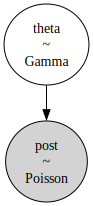

In [3]:
pm.model_to_graphviz(poisson_model)

In [4]:
trace_poisson.posterior.theta.values.ravel()

array([0.59343214, 0.46482938, 0.4810136 , ..., 0.98667837, 0.96650717,
       1.33062475])

<Axes: title={'center': 'theta'}>

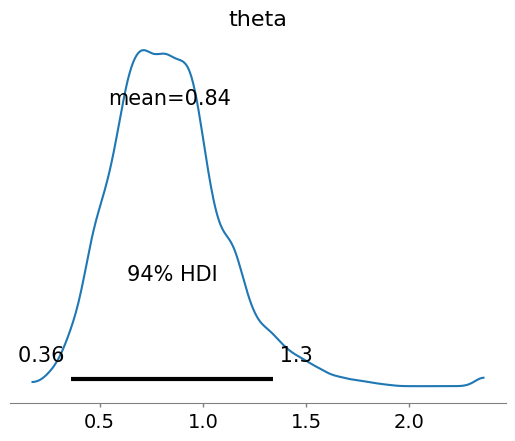

In [5]:
pm.plot_posterior(trace_poisson)

The true posterior distribution is $\textsf{Gamma}(6,7)$. Let's compare it with the one we found using `pymc3`.

In [6]:
post_poisson_summary = az.summary(trace_poisson, kind='stats')
post_poisson_summary

,mean,sd,hdi_3%,hdi_97%
theta,0.836,0.271,0.361,1.339


From the empirical mean and standard deviation of $\theta$ we can estimate the parameters of the corresponding Gamma distribution to compare with the theoretical posterior distribution. To do so, we use the method of moments, let $\bar\theta$ and $s_\theta^2$ the empirical mean and emipirical variance, respectively. Denote by $\hat\alpha$ and $\hat\beta$ the estimators a posteriori of $\alpha$ and $\beta$. We can get them solving the following equations:

$$\frac{\hat\alpha}{\hat\beta} = \bar\theta,$$
$$\frac{\hat\alpha}{\hat\beta} = s_\theta^2.$$

Yielding

$$\hat\alpha = \frac{\bar\theta^2}{s_\theta^2},$$
$$\hat\beta = \frac{\bar\theta}{s_\theta^2}.$$

In [7]:
x = np.linspace(0, 3, 1000)
y = gamma.pdf(x, 10, scale=1/12)

mean_t = post_poisson_summary['mean'].values[0]
sd_t = post_poisson_summary['sd'].values[0]
alpha_t = mean_t**2 / sd_t**2
beta_t = mean_t / sd_t**2
y_pred = gamma.pdf(x, alpha_t, scale=1/beta_t)

Text(0.5, 0, '$\\theta$')

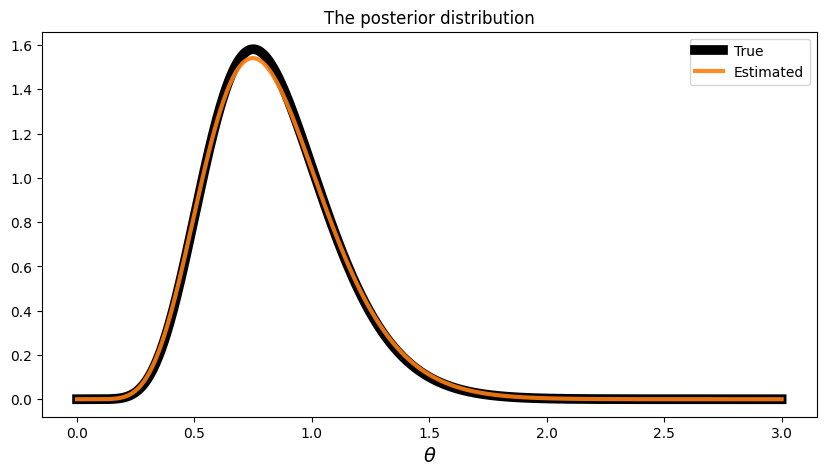

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k', label='True', linewidth=7)
plt.plot(x, y_pred, 'C1', label='Estimated', linewidth=3, alpha=0.9)
plt.legend()
plt.title('The posterior distribution')
plt.xlabel(r'$\theta$', fontsize=14)

Assume that we find 30 deaths over 10 years.

In [9]:
with pm.Model() as poisson_model_2:
    theta = pm.Gamma('theta', alpha=7, beta=10)
    post = pm.Poisson('post', mu=2 * 10 * theta, observed=30)

    trace_poisson_2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


<Axes: title={'center': 'theta'}>

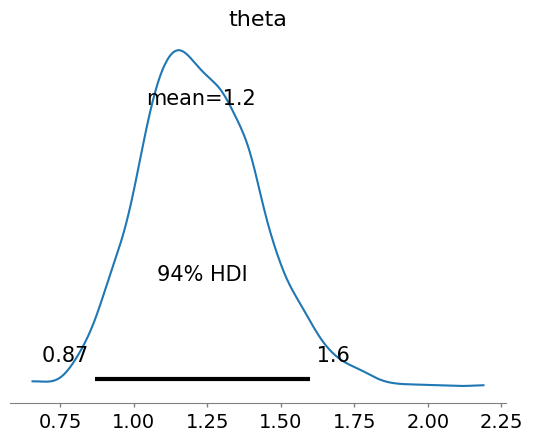

In [10]:
pm.plot_posterior(trace_poisson_2)

The true posterior distribution is $\textsf{Gamma}(33,25)$. Let's compare it with the one we found using `pymc3`.

In [11]:
post_poisson_summary_2 = az.summary(trace_poisson_2, kind='stats')
post_poisson_summary_2

,mean,sd,hdi_3%,hdi_97%
theta,1.228,0.199,0.868,1.599


In [12]:
x = np.linspace(0, 3, 1000)
y = gamma.pdf(x, 37, scale=1/30)

mean_t = post_poisson_summary_2['mean'].values[0]
sd_t = post_poisson_summary_2['sd'].values[0]
alpha_t = mean_t**2 / sd_t**2
beta_t = mean_t / sd_t**2
y_pred = gamma.pdf(x, alpha_t, scale=1/beta_t)

Text(0.5, 0, '$\\theta$')

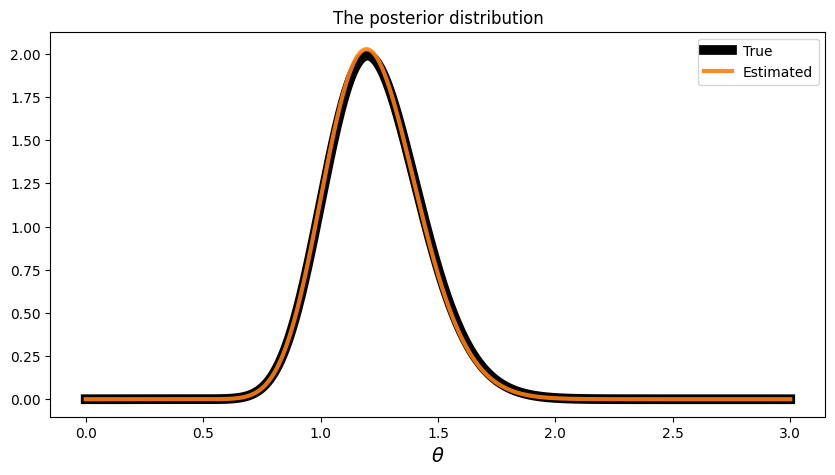

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'k', label='True', linewidth=7)
plt.plot(x, y_pred, 'C1', label='Estimated', linewidth=3, alpha=0.9)
plt.legend()
plt.title('The posterior distribution')
plt.xlabel(r'$\theta$', fontsize=14)